# Cookie Cats A/B Test Result Data Analysis

https://www.kaggle.com/datasets/mursideyarkin/mobile-games-ab-testing-cookie-cats

## Check Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
from scipy.stats import chi2, chi2_contingency

In [2]:
df = pd.read_csv("./Data/cookie_cats.csv", encoding="utf-8")

In [3]:
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [4]:
df.shape

(90189, 5)

Check for duplicate data

In [5]:
df["userid"].nunique() == df["userid"].count()

True

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


## Data preprocessing

In [7]:
df.isnull().sum()

userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64

There are no missing values, so processing of missing values is omitted
<br>
userid is the player's ID number, so converted to character data format
<br>
retention_1 and retention_7 columns are set to True and False, so converted to integer data format

In [8]:
df["userid"] = df["userid"].astype(str)
df[["retention_1", "retention_7"]] = df[["retention_1", "retention_7"]].astype(int)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  object
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  int32 
 4   retention_7     90189 non-null  int32 
dtypes: int32(2), int64(1), object(2)
memory usage: 2.8+ MB


There are a lot of players who have installed the game but never played
<br>
Delete player data that has never actually played the game

In [10]:
sns.set(style="darkgrid")
palette = sns.color_palette("pastel")
colors = palette.as_hex()

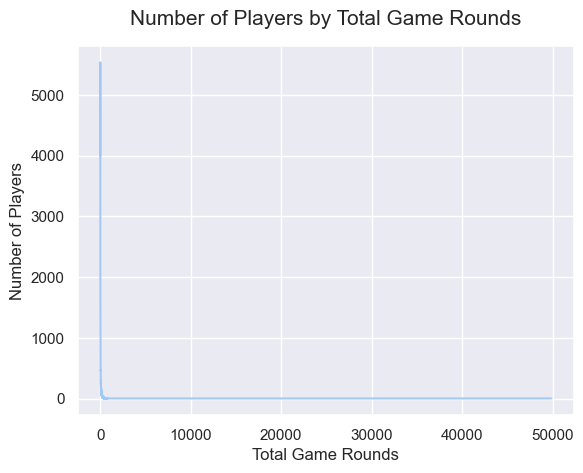

In [11]:
sum_gamerounds_count = df.groupby("sum_gamerounds")["userid"].count()
sns.lineplot(data=sum_gamerounds_count, color=colors[0])
plt.title("Number of Players by Total Game Rounds", size=15, pad=15)
plt.xlabel("Total Game Rounds")
plt.ylabel("Number of Players")
plt.savefig("./Result/sum_gamerounds_v1.png", bbox_inches="tight")

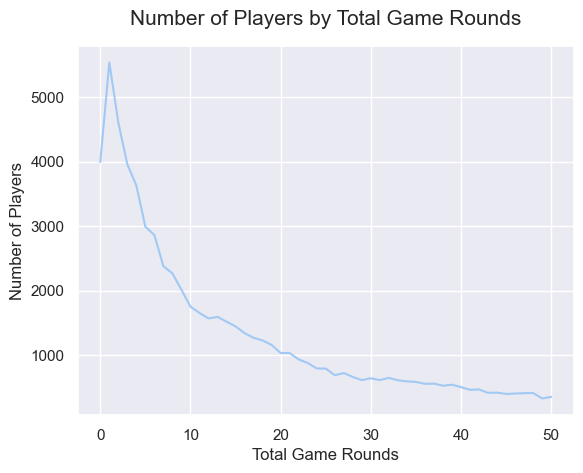

In [12]:
sns.lineplot(data=sum_gamerounds_count[:51], color=colors[0])
plt.title("Number of Players by Total Game Rounds", size=15, pad=15)
plt.xlabel("Total Game Rounds")
plt.ylabel("Number of Players")
plt.savefig("./Result/sum_gamerounds_v2.png", bbox_inches="tight")

In [13]:
print(f"Number of players with a total number of game rounds of 0 : {len(df[df["sum_gamerounds"] == 0]):,}")

Number of players with a total number of game rounds of 0 : 3,994


Anything with a very large total number of game rounds was judged to be a macro or data error and was deleted

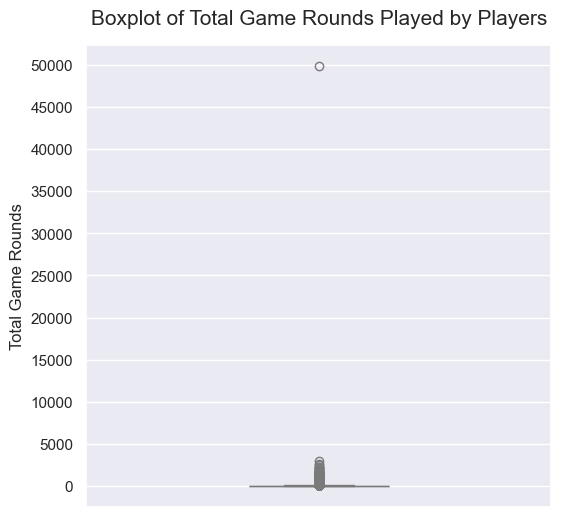

In [14]:
plt.figure(figsize=(6, 6))
sns.boxplot(df["sum_gamerounds"], width=0.3, color=colors[0])
plt.yticks(range(0, 55000, 5000))
plt.title("Boxplot of Total Game Rounds Played by Players", size=15, pad=15)
plt.ylabel("Total Game Rounds")
plt.savefig("./Result/sum_gamerounds_box_v1.png", bbox_inches="tight")

In [15]:
print(f"Maximum total number of game rounds : {df["sum_gamerounds"].max():,}")

Maximum total number of game rounds : 49,854


To increase the reliability of A/B test, remove data from players with less than 30 total game rounds

In [16]:
len(df[df["sum_gamerounds"] < 30])

56920

In [17]:
df = df[(df["sum_gamerounds"] != 0) & (df["sum_gamerounds"] != df["sum_gamerounds"].max())]
df = df[df["sum_gamerounds"] >= 30]

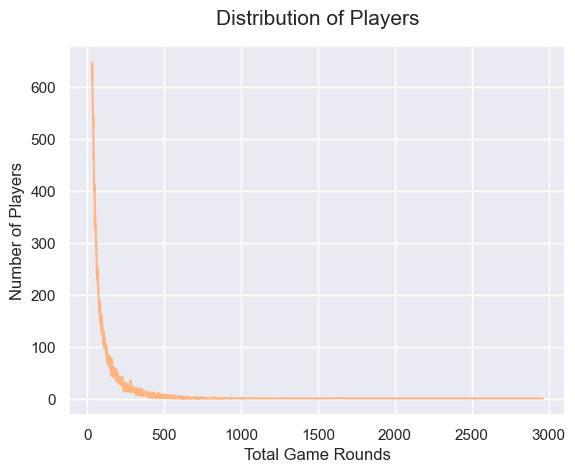

In [18]:
df.groupby("sum_gamerounds")["userid"].count().plot(color=colors[1])
plt.title("Distribution of Players", size=15, pad=15)
plt.xlabel("Total Game Rounds")
plt.ylabel("Number of Players")
plt.savefig("./Result/sum_gamerounds_v3.png", bbox_inches="tight")

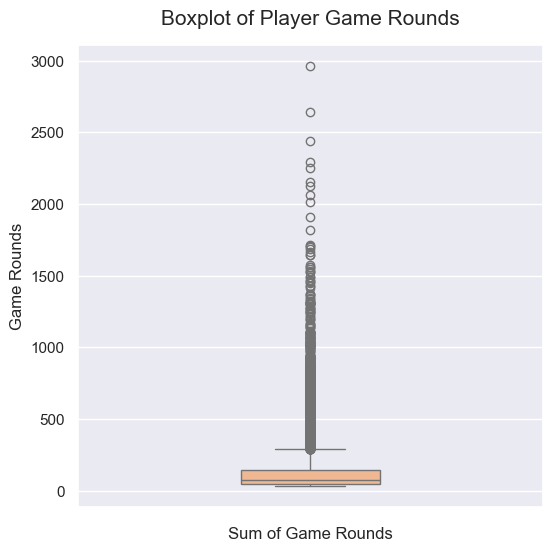

In [19]:
plt.figure(figsize=(6, 6))
sns.boxplot(df["sum_gamerounds"], width=0.3, color=colors[1])
plt.title("Boxplot of Player Game Rounds", size=15, pad=15)
plt.xlabel("Sum of Game Rounds")
plt.ylabel("Game Rounds")
plt.savefig("./Result/sum_gamerounds_box_v2.png", bbox_inches="tight")

In [20]:
df.to_csv("./Data/preprocessed_cookie_cats.csv", index=False, encoding="utf-8")